
#**Improving Safety: Chicago Accident Data Analysis**


---


**Contributors:**
Jishnu Moorthy, Fahad Alsubaie, Chen He, Shubham Mishra, Yuchen Li, Yahui Wen

# **Report Summary**:
In this study, we analyzed the dataset of car crash records in the city of Chicago for the past five years since the comprehensive recording was in place in 2018.

In order to improve road safety, we first looked at when and where the accdiencts happened, by doing a timeseries plot, and histograms of the distribution of crashes, we formulated a basic understanding of the car crash trends. Then, we looked on the microscopic level of events of the trafficway type, streets and crash types to pinpoint to the top streets of crash occurences. The last step in this phase is completed by a comprehensive map that records the location of the accidents, and the repsonse time associated.

Following this, we continued to looking at the what component of the incidents by looking at the external conditions of the crash, and whether work zone had any effects of crash numbers.

Lastly, we looked at the implications and consequences of the accidents, through looking at the distribution of injuries and the associated financial losses, as well as a breakdown of primary contributory causes of it.

# **Problem Definition**




##Project objective
This analysis aims to study the problem of car accidents in Chicago by examining influential factors, with a focus on safety concerns. It seeks to reveal patterns and significant causes through accident data analysis, offering insights for residents and authorities to mitigate risks and enhance overall safety.

##Motivation

Our motivation is to enhance road safety by identifying accident patterns and causes. This informs the development of safety measures and efficient resource allocation for interventions, such as prioritizing road maintenance in high-accident areas, ultimately reducing the risk of future accidents.

##Data Source

The dataset was obtained from Data.gov. It contains all the car crashes reported and recorded in the city of Chicago since 2015.

Link to the publisher can be found [here](https://catalog.data.gov/dataset?publisher=data.cityofchicago.org)



The link to the dataset is [here](https://catalog.data.gov/dataset/traffic-crashes-crashes)

#**Data Overview and Processing**


##Data Overview


Import necessary libraries and load the dataset:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from IPython.display import display
from matplotlib.ticker import FixedLocator, FixedFormatter
import calendar
import plotly.express as px

df_raw = pd.read_csv('https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD')

df_raw.head()


CRASH_RECORD_ID     RD_NO  \
0  8b93572288255fb4640953aa3cc17d33804652aabb7f48...       NaN   
1  23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...  JG412655   
2  2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...  JG434996   
3  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...  JG361138   
4  7ebf015016f83d09b321afd671a836d6b148330535d5df...  JG376618   

  CRASH_DATE_EST_I              CRASH_DATE  POSTED_SPEED_LIMIT  \
0              NaN  10/08/2023 11:45:00 AM                  30   
1              NaN  09/05/2023 07:05:00 PM                  30   
2              NaN  09/22/2023 06:45:00 PM                  50   
3              NaN  07/29/2023 02:45:00 PM                  30   
4              NaN  08/09/2023 11:00:00 PM                  30   

  TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION WEATHER_CONDITION  \
0         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR   
1         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR   
2            NO CONTROLS           NO CONTROLS             CLEAR   
3         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR   
4            NO CONTROLS           NO CONTROLS             CLEAR   

       LIGHTING_CONDITION          FIRST_CRASH_TYPE  ...  \
0                DAYLIGHT                   TURNING  ...   
1                    DUSK                     ANGLE  ...   
2  DARKNESS, LIGHTED ROAD                  REAR END  ...   
3                DAYLIGHT      PARKED MOTOR VEHICLE  ...   
4  DARKNESS, LIGHTED ROAD  SIDESWIPE SAME DIRECTION  ...   

  INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
0                         0.0                            0.0   
1                         2.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

  INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
0                    2.0              0.0         11                 1   
1                    2.0              0.0         19                 3   
2                    2.0              0.0         18                 6   
3                    1.0              0.0         14                 7   
4                    2.0              0.0         23                 4   

  CRASH_MONTH  LATITUDE  LONGITUDE                                  LOCATION  
0          10       NaN        NaN                                       NaN  
1           9       NaN        NaN                                       NaN  
2           9       NaN        NaN                                       NaN  
3           7  41.85412 -87.665902  POINT (-87.665902342962 41.854120262952)  
4           8       NaN        NaN                                       NaN  

[5 rows x 49 columns]

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771672 entries, 0 to 771671
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                771672 non-null  object 
 1   RD_NO                          767164 non-null  object 
 2   CRASH_DATE_EST_I               58060 non-null   object 
 3   CRASH_DATE                     771672 non-null  object 
 4   POSTED_SPEED_LIMIT             771672 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         771672 non-null  object 
 6   DEVICE_CONDITION               771672 non-null  object 
 7   WEATHER_CONDITION              771672 non-null  object 
 8   LIGHTING_CONDITION             771672 non-null  object 
 9   FIRST_CRASH_TYPE               771672 non-null  object 
 10  TRAFFICWAY_TYPE                771672 non-null  object 
 11  LANE_CNT                       199006 non-null  float64
 12  ALIGNMENT                     

In [ ]:
df_raw.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [ ]:
df_raw.isnull().sum().sort_values(ascending=False)

WORKERS_PRESENT_I                770525
DOORING_I                        769287
WORK_ZONE_TYPE                   768194
WORK_ZONE_I                      767202
PHOTOS_TAKEN_I                   761712
STATEMENTS_TAKEN_I               754827
NOT_RIGHT_OF_WAY_I               735874
CRASH_DATE_EST_I                 713612
INTERSECTION_RELATED_I           594883
LANE_CNT                         572666
HIT_AND_RUN_I                    530680
REPORT_TYPE                       22280
LOCATION                           5142
LONGITUDE                          5142
LATITUDE                           5142
RD_NO                              4508
MOST_SEVERE_INJURY                 1691
INJURIES_INCAPACITATING            1680
INJURIES_NON_INCAPACITATING        1680
INJURIES_UNKNOWN                   1680
INJURIES_NO_INDICATION             1680
INJURIES_TOTAL                     1680
INJURIES_REPORTED_NOT_EVIDENT      1680
INJURIES_FATAL                     1680
BEAT_OF_OCCURRENCE                    5


##Data Cleaning
We considered which columns should we retain to address our problem definition, and which ones can we omit to create a more streamlined and compact dataset.
After dropping the omitted columns, we have a dataset with the important columns that would lead us to creating meaningful insights.

We identified columns with high null and irrelevant data and replaced them with "Not Available" for consistency.
A temporal filter was applied to retain data collected from 2018 onwards, reflecting updated data collection procedures post-September 2017.
We carefully filtered the dataset, excluding all instances of "Not Available," to focus on meaningful data points.
This meticulous cleaning process resulted in a refined and reliable dataset, ready for further analysis.

In [ ]:
# Replacing 'NA', 'NaN', and empty cells with 'Not Available' in the entire DataFrame
df_raw = df_raw.fillna('Not Available')
df_raw = df_raw.replace('', 'Not Available')
df_raw = df_raw.replace('NA', 'Not Available')
df_raw = df_raw.replace('NaN', 'Not Available')

df_raw['CRASH_DATE'] = pd.to_datetime(df_raw['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')
df_raw = df_raw[df_raw['CRASH_DATE'].dt.year >= 2018].copy()

# Checking for missing values in the DataFrame
print(df_raw.isnull().sum())

# Dropping columns that are irrelevant to your data exploration
df_raw = df_raw.drop(['RD_NO', 'CRASH_DATE_EST_I', 'LANE_CNT', 'REPORT_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'STREET_DIRECTION'], axis=1)

# Create a new DataFrame df_filtered by excluding rows with all "Not Available" values
df = df_raw[(df_raw != 'Not Available').any(axis=1)]


CRASH_RECORD_ID                  0
RD_NO                            0
CRASH_DATE_EST_I                 0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
LANE_CNT                         0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY_I               0
HIT_AND_RUN_I                    0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
PHOTOS_TAKEN_I      

In [ ]:
df.head()

CRASH_RECORD_ID          CRASH_DATE  \
0  8b93572288255fb4640953aa3cc17d33804652aabb7f48... 2023-10-08 11:45:00   
1  23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7... 2023-09-05 19:05:00   
2  2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f... 2023-09-22 18:45:00   
3  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4... 2023-07-29 14:45:00   
4  7ebf015016f83d09b321afd671a836d6b148330535d5df... 2023-08-09 23:00:00   

   POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
0                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
1                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
2                  50            NO CONTROLS           NO CONTROLS   
3                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
4                  30            NO CONTROLS           NO CONTROLS   

  WEATHER_CONDITION      LIGHTING_CONDITION          FIRST_CRASH_TYPE  \
0             CLEAR                DAYLIGHT                   TURNING   
1             CLEAR                    DUSK                     ANGLE   
2             CLEAR  DARKNESS, LIGHTED ROAD                  REAR END   
3             CLEAR                DAYLIGHT      PARKED MOTOR VEHICLE   
4             CLEAR  DARKNESS, LIGHTED ROAD  SIDESWIPE SAME DIRECTION   

                   TRAFFICWAY_TYPE           ALIGNMENT  ...  \
0       DIVIDED - W/MEDIAN BARRIER  STRAIGHT AND LEVEL  ...   
1              FIVE POINT, OR MORE  STRAIGHT AND LEVEL  ...   
2       DIVIDED - W/MEDIAN BARRIER  STRAIGHT AND LEVEL  ...   
3  DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL  ...   
4                      NOT DIVIDED  STRAIGHT AND LEVEL  ...   

  INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT  \
0                         0.0                           0.0   
1                         2.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.0                           0.0   

  INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
0                    2.0              0.0         11                 1   
1                    2.0              0.0         19                 3   
2                    2.0              0.0         18                 6   
3                    1.0              0.0         14                 7   
4                    2.0              0.0         23                 4   

  CRASH_MONTH       LATITUDE      LONGITUDE  \
0          10  Not Available  Not Available   
1           9  Not Available  Not Available   
2           9  Not Available  Not Available   
3           7       41.85412     -87.665902   
4           8  Not Available  Not Available   

                                   LOCATION  
0                             Not Available  
1                             Not Available  
2                             Not Available  
3  POINT (-87.665902342962 41.854120262952)  
4                             Not Available  

[5 rows x 34 columns]

## Data dictionary
Each row now in the dataset represents a traffic crash reported in Chicago. After data cleaning, we kept following columns and referred to the meanings of each column are from the [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if):

|Variables   |Definitions|
------------------- |------------------
|CRASH_RECORD_ID      | serves as a unique ID in this dataset.|
|CRASH_DATE       | Date and time of crash as entered by the reporting officer |
|POSTED_SPEED_LIMIT       | Posted speed limit, as determined by reporting officer |
|TRAFFIC_CONTROL_DEVICE      | Traffic control device present at crash location, as determined by reporting officer |
|DEVICE_CONDITION       | Condition of traffic control device, as determined by reporting officer |
|WEATHER_CONDITION     | Weather condition at time of crash, as determined by reporting officer |
|LIGHTING_CONDITION      | Light condition at time of crash, as determined by reporting officer  |
|FIRST_CRASH_TYPE     | Type of first collision in crash|
|TRAFFICWAY_TYPE       | Trafficway type, as determined by reporting officer |
|ALIGNMENT       | Street alignment at crash location, as determined by reporting officer |
|ROADWAY_SURFACE_COND       | Road surface condition, as determined by reporting officer|
|ROAD_DEFECT      | Road defects, as determined by reporting officer |
|CRASH_TYPE       | A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away |
|HIT_AND_RUN_I      | Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid|
|DAMAGE     | A field observation of estimated damage |
|DATE_POLICE_NOTIFIED	      | Calendar date on which police were notified of the crash|
|PRIM_CONTRIBUTORY_CAUSE       | The factor which was most significant in causing the crash, as determined by officer judgment |
|STREET_NO      | Street address number of crash location, as determined by reporting officer |
|STREET_NAME      | Street address name of crash location, as determined by reporting officer |
|WORK_ZONE_I      | 	Whether the crash occurred in an active work zone |
|MOST_SEVERE_INJURY      |Most severe injury sustained by any person involved in the crash |
|CRASH_HOUR	      | The hour of the day component of CRASH_DATE.|
|CRASH_DAY_OF_WEEK       | The day of the week component of CRASH_DATE. Sunday=1 |
|CRASH_MONTH      | The month component of CRASH_DATE |
|LATITUDE      |The latitude of the crash location, as determined by reporting officer, as derived from the reported address of crash |
|LONGITUDE	      | The longitude of the crash location, as determined by reporting officer, as derived from the reported address of crash|
|LOCATION       | The crash location, as determined by reporting officer, as derived from the reported address of crash, in a column type that allows for mapping and other geographic analysis in the data portal software |

#**Data Exploration**
This analysis aims to explore the occurrences of car crashes after 2018 across the city of Chicago. Aimed at improving road safety in Chicago, this analysis proceeds in the sequence of understanding the where, when, what, and the implications of the car accidents.



##Topic 1: When and Where did these accidents occur?##

###1.1: Accidents trend by year
What is the trend of crashes over the past 5 years?

In [ ]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])  # converting 'CRASH_DATE' to datetime for time series plot
df['Year'] = df['CRASH_DATE'].dt.year  # extracting year for plot
df['Month'] = df['CRASH_DATE'].dt.month  # extracting month for plot

# filtering data for the specified date range (from January 2018 to now)
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-09-30')
df_filtered = df[(df['CRASH_DATE'] >= start_date) & (df['CRASH_DATE'] <= end_date)]

monthly_accidents = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Accidents')  # using groupby function to count the number of accidents in year and month

# formating the 'Year-Month' labels as 'Mon YY'
monthly_accidents['Year-Month'] = monthly_accidents.apply(lambda row: f"{calendar.month_abbr[row['Month']]} '{str(row['Year'])[2:]}",
                                                          axis=1)

# creating interactive time series plot using plotly express
fig = px.line(monthly_accidents, x='Year-Month', y='Accidents', title='Monthly Accident Trends from January 2018 to September 2023')
fig.update_xaxes(title_text='Month-Year')
fig.update_yaxes(title_text='Number of Accidents')
fig.update_layout(title_x=0.5)  # Set the title to the center
fig.show()


We used a time series plot to visualize how the number of accidents change over time (Jan 2018 - Dec 2022).

We used the Plotly Express library to generate an interactive time series plot which slows the month-year labels, number of accidents and the plot title to show what we are trying to visualize.

From Feb 2020 to Apr 2020, there was a large decrease in number of accidents in Chicago, most likely due to lockdown in the U.S. because of COVID-19 pandemic.

In May 2018, there was the highest number of accident occurrences.

###1.2a: Distribution of crashes by month
What months experienced the higheset crashes and what months had the least crashes?

In [ ]:
#Selecting crashes that happened from 2018-2022

df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')
df = df[(df['CRASH_DATE'].dt.year >= 2018) & (df['CRASH_DATE'].dt.year <= 2022)]

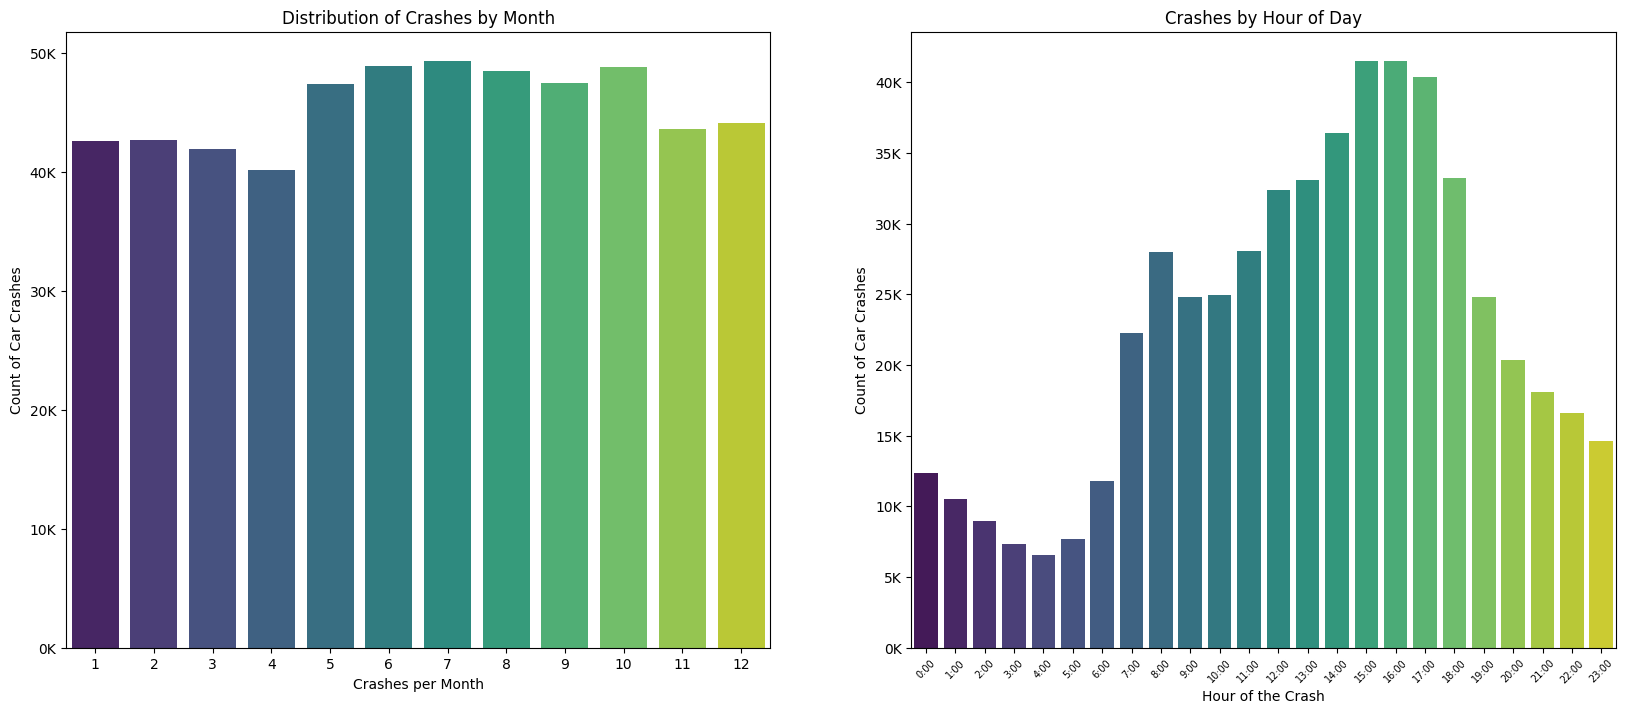

In [ ]:
#Graph 1: Distribution of Crashes by Month

from matplotlib.ticker import FixedLocator, FixedFormatter
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='CRASH_MONTH', palette='viridis')
plt.xlabel('Crashes per Month')
plt.ylabel('Count of Car Crashes')
plt.title('Distribution of Crashes by Month')

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))


# Graph 2: Crashes by Hour of Day

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='CRASH_HOUR', palette='viridis')
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day')
plt.xticks(rotation=45, fontsize=7)

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))

x_ticks = ax.get_xticks()
x_labels = [str(int(label)) + ":00" for label in x_ticks]
ax.set_xticklabels(x_labels)

plt.show();

Observing the distribution of crashes by month, we noticed the highest number of crashes in July and October, with May, August, and September immediately following it. The month least number of crashes was April.

Looking at the hour when the crash happened, it is noted that the most crashes occurred from 3-5pm, which is the time when school are ending and people are starting to get back from work.

To determine if there were any differences in crash distribution by hour for the months, we picked two of the highest months, July and October and broke down the crashes by hour for further analysis.

###1.2b: Distribution of crashes by hour
What hours of the day had the most crashes?


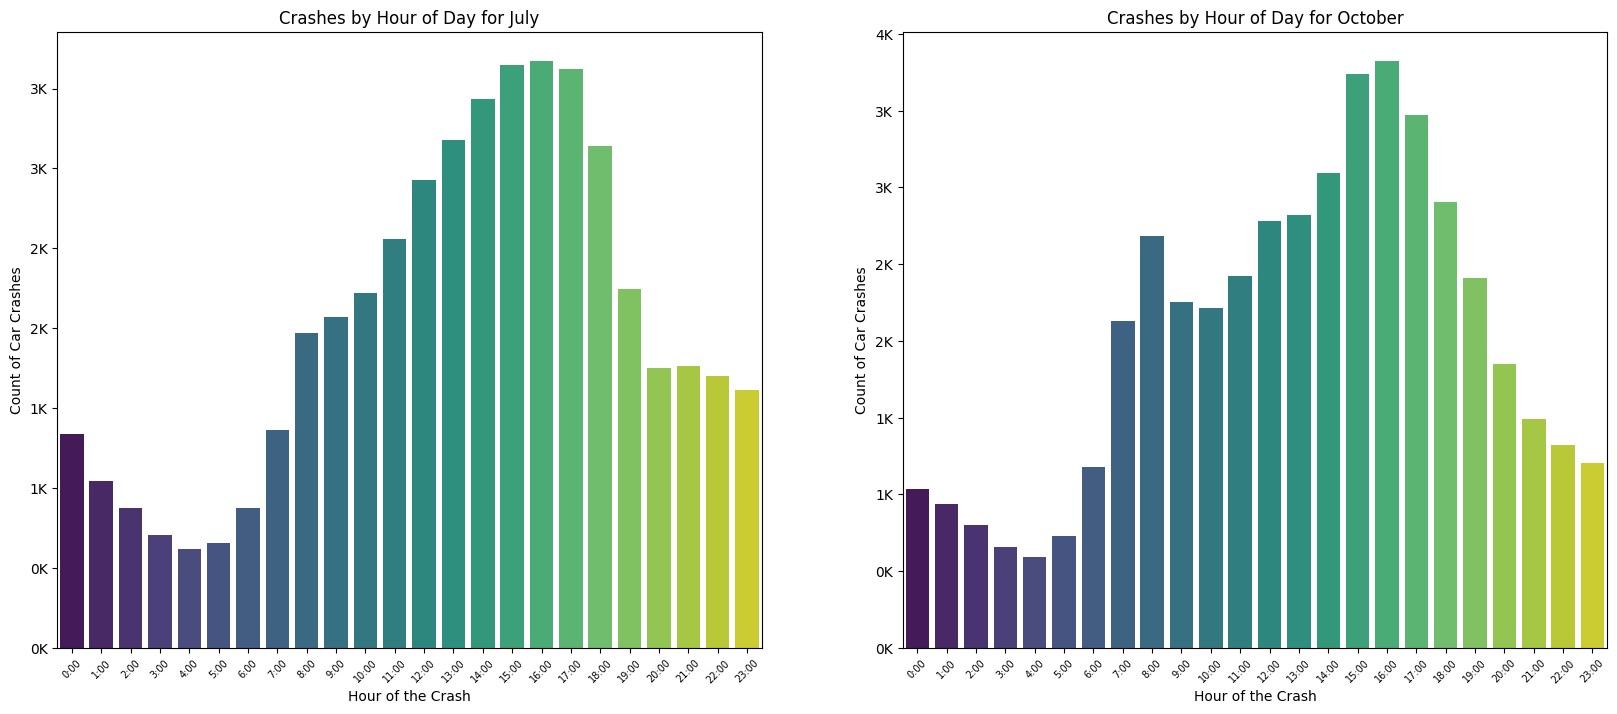

In [ ]:
# Graph 1: Crashes by Hour of Day for July
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
df_July = df[df["CRASH_MONTH"]== 7]
sns.countplot(data=df_July, x='CRASH_HOUR', palette='viridis')
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day for July')
plt.xticks(rotation=45, fontsize=7)

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))

x_ticks = ax.get_xticks()
x_labels = [str(int(label)) + ":00" for label in x_ticks]
ax.set_xticklabels(x_labels)

# Graph 2: Crashes by Hour of Day for October
plt.subplot(1, 2, 2)
df_Oct = df[df["CRASH_MONTH"]== 10]
sns.countplot(data=df_Oct, x='CRASH_HOUR', palette='viridis')
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day for October')
plt.xticks(rotation=45, fontsize=7)

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))

x_ticks = ax.get_xticks()
x_labels = [str(int(label)) + ":00" for label in x_ticks]
ax.set_xticklabels(x_labels)

plt.show();


From the above graphs, it can be noticed that overall there is relatively more crashes during the afternoon hours, from 3-6pm. The number of crashes decreased as the time approaches midnight, which is likely due to the trend of decrease in traffice as it extends into midnight.
Further, in October, there is a noticable spike from 7-9am, which is the rush hour to work.

###1.3: Accident-prone trafficway type
To get the overview of the car crashes condition, we also need to know where they occured. Is there any specific type of trafficway that is accident-proned?
Is there any specific type of trafficway that is accident-proned?

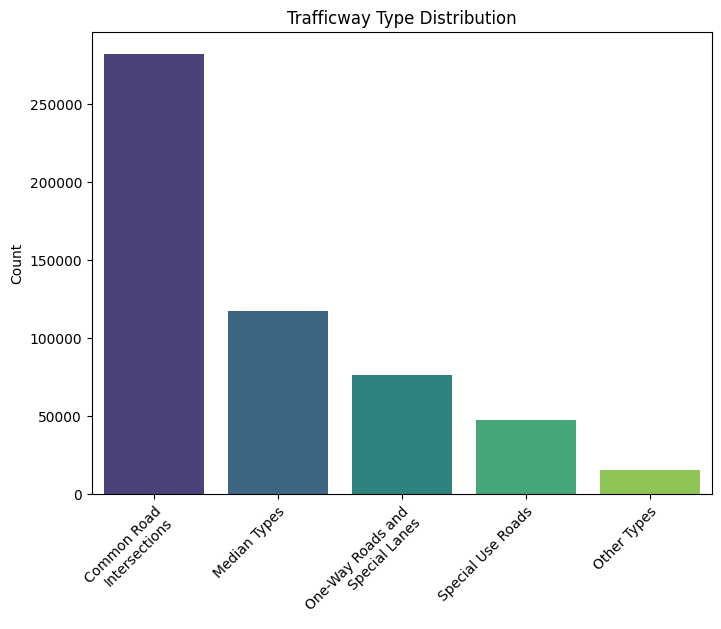

In [ ]:
filtered_df = df[~df['TRAFFICWAY_TYPE'].isin(['UNKNOWN', 'UNKNOWN INTERSECTION TYPE', 'NOT REPORTED'])].copy()

traffic_way_type_mapping = {
    'Common Road Intersections': ['NOT DIVIDED', 'T-INTERSECTION', 'FOUR WAY', 'L-INTERSECTION', 'Y-INTERSECTION'],
    'One-Way Roads and Special Lanes': ['ONE-WAY', 'CENTER TURN LANE', 'RAMP', 'ROUNDABOUT'],
    'Special Use Roads': ['ALLEY', 'DRIVEWAY', 'PARKING LOT'],
    'Median Types': ['DIVIDED - W/MEDIAN (NOT RAISED)', 'DIVIDED - W/MEDIAN BARRIER'],
    'Other Types': ['OTHER', 'FIVE POINT OR MORE', 'TRAFFIC ROUTE']
}

filtered_df['TRAFFICWAY_TYPE'] = filtered_df['TRAFFICWAY_TYPE'].map(
    {value: category for category, values in traffic_way_type_mapping.items() for value in values}
)

trafficway_counts = filtered_df['TRAFFICWAY_TYPE'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=trafficway_counts.index, y=trafficway_counts.values, palette='viridis',linewidth=0.5)
plt.title('Trafficway Type Distribution')
plt.xlabel('Trafficway Type')
plt.ylabel('Count')
plt.xticks(rotation=45, wrap=True,ha='right')
plt.show()

Common Road Intersections dominate the dataset, indicating high traffic flow and potential accident risks. Improving traffic planning and signal system at these locations may help to reduce accidents. Median Types also show a relatively high number of accidents, possibly related to crossing medians. Government might need to reassess the designs of these medians to reduce accidents related to medians crossings. One-Way Roads, special Lanes, special Use Roads might require enhanced signals and warnings to alert drivers, thereby enhancing overall safety.

###1.4: Accident-prone streets and their crash types
What are the specific streets or intersections where the majority of accidents occur? And what types of crashes happened there?

In [ ]:
street_accident_counts = df['STREET_NAME'].value_counts()
top_10_street = street_accident_counts.head(10)
top_10_street

WESTERN AVE       15073
PULASKI RD        12924
CICERO AVE        12149
ASHLAND AVE       12076
HALSTED ST        10766
KEDZIE AVE         9418
MICHIGAN AVE       6556
NORTH AVE          6230
STATE ST           5978
IRVING PARK RD     5602
Name: STREET_NAME, dtype: int64

In [ ]:
western_ave_filter = df[df['STREET_NAME'] == 'WESTERN AVE']
pulaski_rd_filter = df[df['STREET_NAME'] == 'PULASKI RD']
cicero_ave_filter = df[df['STREET_NAME'] == 'CICERO AVE']
ashland_ave_filter = df[df['STREET_NAME'] == 'ASHLAND AVE']
halsted_st_filter = df[df['STREET_NAME'] == 'HALSTED ST']
kedzie_ave_filter = df[df['STREET_NAME'] == 'KEDZIE AVE']
michigan_ave_filter = df[df['STREET_NAME'] == 'MICHIGAN AVE']
north_ave_filter = df[df['STREET_NAME'] == 'NORTH AVE']
state_st_filter = df[df['STREET_NAME'] == 'STATE ST']
irving_park_filter = df[df['STREET_NAME'] == 'IRVING PARK RD']

top_crash_types = {
    'WESTERN AVE': western_ave_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'PULASKI RD': pulaski_rd_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'CICERO AVE': cicero_ave_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'ASHLAND AVE': ashland_ave_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'HALSTED ST': halsted_st_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'KEDZIE AVE': kedzie_ave_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'MICHIGAN AVE': michigan_ave_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'NORTH AVE': north_ave_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'STATE ST': state_st_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index,
    'IRVING PARK RD': irving_park_filter['FIRST_CRASH_TYPE'].value_counts().nlargest(5).index
}
top_crash_types

{'WESTERN AVE': Index(['REAR END', 'SIDESWIPE SAME DIRECTION', 'TURNING',
        'PARKED MOTOR VEHICLE', 'ANGLE'],
       dtype='object'),
 'PULASKI RD': Index(['REAR END', 'TURNING', 'SIDESWIPE SAME DIRECTION',
        'PARKED MOTOR VEHICLE', 'ANGLE'],
       dtype='object'),
 'CICERO AVE': Index(['REAR END', 'TURNING', 'SIDESWIPE SAME DIRECTION', 'ANGLE',
        'PARKED MOTOR VEHICLE'],
       dtype='object'),
 'ASHLAND AVE': Index(['REAR END', 'SIDESWIPE SAME DIRECTION', 'PARKED MOTOR VEHICLE',
        'TURNING', 'ANGLE'],
       dtype='object'),
 'HALSTED ST': Index(['REAR END', 'SIDESWIPE SAME DIRECTION', 'TURNING',
        'PARKED MOTOR VEHICLE', 'ANGLE'],
       dtype='object'),
 'KEDZIE AVE': Index(['REAR END', 'TURNING', 'SIDESWIPE SAME DIRECTION',
        'PARKED MOTOR VEHICLE', 'ANGLE'],
       dtype='object'),
 'MICHIGAN AVE': Index(['SIDESWIPE SAME DIRECTION', 'REAR END', 'TURNING',
        'PARKED MOTOR VEHICLE', 'ANGLE'],
       dtype='object'),
 'NORTH AVE': Index(['R

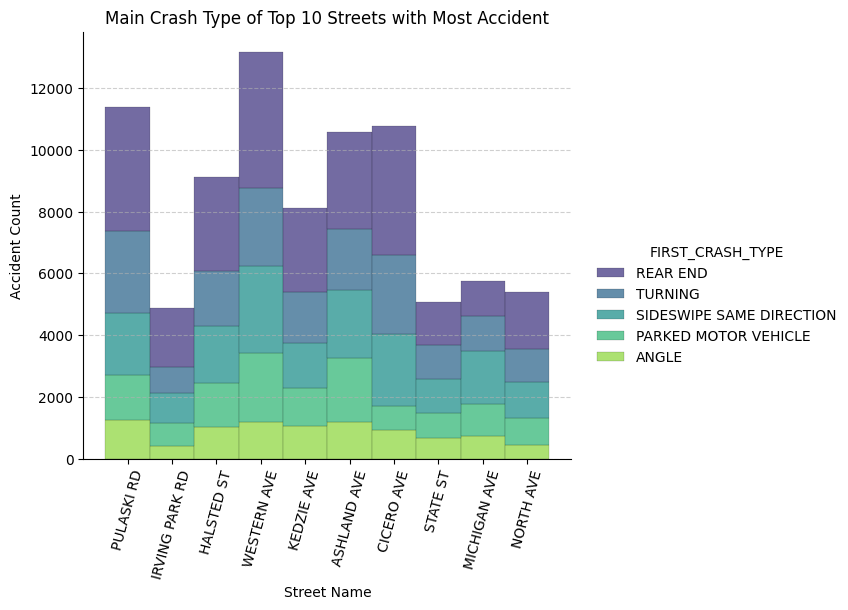

In [ ]:
streets=['WESTERN AVE', 'PULASKI RD', 'CICERO AVE', 'ASHLAND AVE', 'HALSTED ST','KEDZIE AVE','MICHIGAN AVE','NORTH AVE','STATE ST','IRVING PARK RD']
crashtype=['REAR END', 'SIDESWIPE SAME DIRECTION', 'TURNING','PARKED MOTOR VEHICLE', 'ANGLE']
df_filter = df[df['STREET_NAME'].isin(streets) & df['FIRST_CRASH_TYPE'].isin(crashtype)]
sns.displot(data=df_filter, x="STREET_NAME", hue="FIRST_CRASH_TYPE", multiple="stack", height=5, aspect=1.2,palette="viridis",linewidth=0.1)

plt.title('Main Crash Type of Top 10 Streets with Most Accident')
plt.xlabel('Street Name')
plt.ylabel('Accident Count')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

Among Chicago's top 10 roads with the most of crashes, the types of crashes are consistent. Rear-end collisions have been most prevalent, particularly on Western Ave, Pulaski Rd, and Ashland Ave, underscoring the urgency of awareness campaigns against tailgating and distracted driving. Additionally, there are lots of side collisions and turning collisions, indicating the necessity of enhancing lane markings and providing clearer instructions. Furthermore, angle collisions reveal the necessity to improve visibility and design at these intersections. Solving these issues could help to  enhance road safety on these streets in Chicago.

###1.5: Map of locations that crashes occured





In [ ]:
import folium
from folium.plugins import MarkerCluster
import random

df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED'])
df['crash_time'] = df['CRASH_DATE'].dt.time
df['police_notification_time'] = df['DATE_POLICE_NOTIFIED'].dt.time

df['reported_time_min'] = (pd.to_datetime(df['DATE_POLICE_NOTIFIED']) - pd.to_datetime(df['CRASH_DATE'])).dt.total_seconds() / 60

# Filter out rows with "Not Available" latitude and longitude values
df = df[df['LATITUDE'] != 'Not Available']
df = df[df['LONGITUDE'] != 'Not Available']

sample_size = 3000  # You can change this to control the sample size
sampled_df = df.sample(sample_size)   # Sampling a subset of data

# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(chicago_map)

for index, row in sampled_df.iterrows():

    # Creating pop-ups
    popup_text = f"""
    <strong>Location:</strong> {row['LATITUDE']}, {row['LONGITUDE']}<br>
    <strong>Speed Limit:</strong> {row['POSTED_SPEED_LIMIT']} mph<br>
    <strong>Primary Cause:</strong> {row['PRIM_CONTRIBUTORY_CAUSE']}<br>
    <strong>Damage Cost:</strong> {row['DAMAGE']}<br>
    <strong>Date + Time:</strong> {row['CRASH_DATE']}<br>
    <strong> Crash Notification Time:</strong> {row['reported_time_min']} mins<br>
    """

    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=folium.Popup(popup_text, max_width=300),  # formatting the text with the pop-up
    ).add_to(marker_cluster)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Chicago Car Crashes</b></h3>
             '''
chicago_map.get_root().html.add_child(folium.Element(title_html)) # Adding a title to the map

chicago_map.save('chicago_car_crashes.html')  # Saving as an HTML file

chicago_map  # Displaying the Chicago map in Google Colab


To have a direct overview of the location of the accidents, we utilized the latitude and longitude of the variables to create an **interactive** geospatial map of accidents across Chicago. We used the folium's MarkerClusterm plugin which has a default maximum cluster size of 5000 markers. Since our dataset is already extremely large, in order to properly present, we used data sampling and marker clustering to improve performance.

Here, we added pop ups using popup_text to add information about primary cause of crash, location, date + time, speed limit and damage cost to show how and why the crash took place. This gives us detailed insight about where crashes are more likely to occur in a randomly sampled subset of data from our dataframe from chicago.

##Topic 2: What happened during these incidents?

###2.1: Distribution of external conditions
What are the external conditions(lighting, road, weather and traffic control)of the accidents that happened?


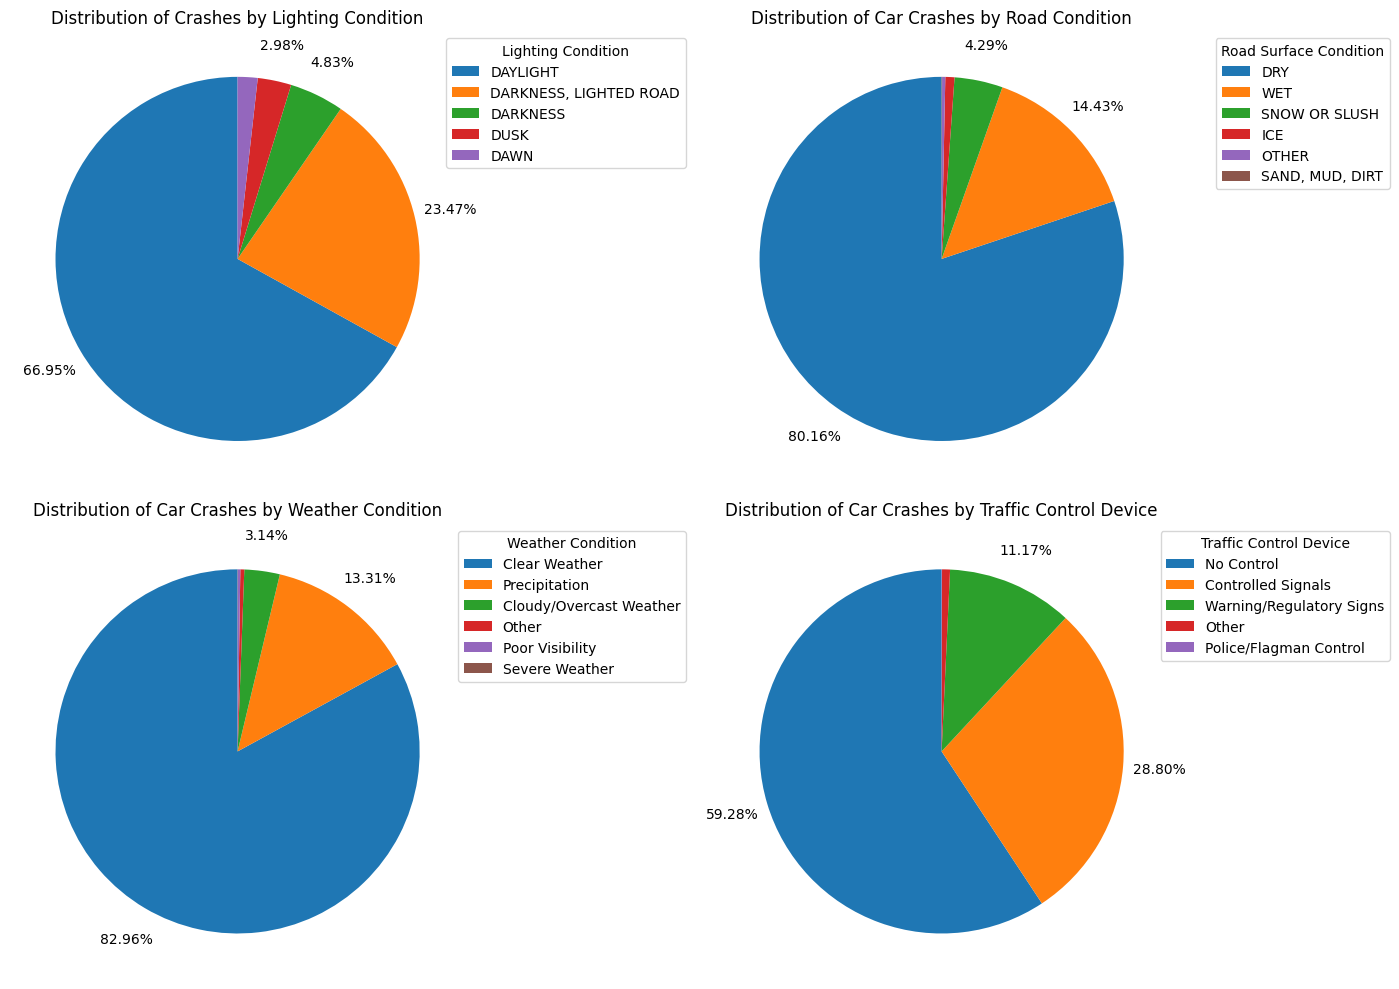

In [ ]:
# Create a mapping dictionary to categorize the traffic control devices
traffic_control_mapping = {
  'Controlled Signals': ['TRAFFIC SIGNAL', 'FLASHING CONTROL SIGNAL', 'RR CROSSING SIGN', 'RAILROAD CROSSING GATE'],
    'Warning/Regulatory Signs': ['STOP SIGN/FLASHER', 'NO PASSING', 'YIELD', 'SCHOOL ZONE', 'DELINEATORS', 'LANE USE MARKING',
                                 'BICYCLE CROSSING SIGN', 'PEDESTRIAN CROSSING SIGN', 'OTHER WARNING SIGN', 'OTHER REG. SIGN'],
    'Police/Flagman Control': ['POLICE/FLAGMAN'],
    'Other': ['UNKNOWN', 'OTHER', 'OTHER RAILROAD CROSSING'],'No Control':['NO CONTROLS']
}

# Map 'TRAFFIC_CONTROL_DEVICE' column to the new categories
df['TRAFFIC_CONTROL_DEVICE_CATEG'] = df['TRAFFIC_CONTROL_DEVICE'].map(
    {value: category for category, values in traffic_control_mapping.items() for value in values}
)

#create a mapping dictionary to categorize the weather condition
weather_condition_mapping={
    'Clear Weather':['CLEAR'],'Precipitation':['RAIN','SNOW','FREEZING RAIN/DRIZZLE','SLEET/HAIL'],
    'Cloudy/Overcast Weather':['CLOUDY/OVERCAST'],'Poor Visibility':['FOG/SMOKE/HAZE','BLOWING SNOW','BLOWING SAND, SOIL, DIRT'],
    'Severe Weather':['SEVERE CROSS WIND GATE'],'Other':['OTHER','UNKNOWN']
}
# Map 'WEATHER_CONDITION' column to the new categories
df['WEATHER_CONDITION_CATEG'] = df['WEATHER_CONDITION'].map(
    {value: category for category, values in weather_condition_mapping.items() for value in values}
)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Create a function to filter the percentage greater than 2% and show it on the plots
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct > 2:
        return "{:.2f}%".format(pct)
    else:
        return ""

# Lighting Condition
filter1 = df["LIGHTING_CONDITION"] != "UNKNOWN"
lighting_counts = df[filter1]['LIGHTING_CONDITION'].value_counts()
axs[0, 0].pie(lighting_counts, autopct=lambda pct: func(pct, lighting_counts), startangle=90, pctdistance=1.2)
axs[0, 0].set_title('Distribution of Crashes by Lighting Condition')
axs[0, 0].legend(lighting_counts.index, title="Lighting Condition", loc="upper right", bbox_to_anchor=(1.5, 1))

# Road Surface Condition
filter2 = df["ROADWAY_SURFACE_COND"] != "UNKNOWN"
road_surface_counts = df[filter2]['ROADWAY_SURFACE_COND'].value_counts()
axs[0, 1].pie(road_surface_counts, autopct=lambda pct: func(pct, road_surface_counts), startangle=90, pctdistance=1.2)
axs[0, 1].set_title('Distribution of Car Crashes by Road Condition')
axs[0, 1].legend(road_surface_counts.index, title="Road Surface Condition", loc="upper right", bbox_to_anchor=(1.5, 1))

# Weather Condition
filter3 = df["WEATHER_CONDITION"] != "UNKNOWN"
weather_counts = df[filter3]['WEATHER_CONDITION_CATEG'].value_counts()
axs[1, 0].pie(weather_counts, autopct=lambda pct: func(pct, weather_counts), startangle=90, pctdistance=1.2)
axs[1, 0].set_title('Distribution of Car Crashes by Weather Condition')
axs[1, 0].legend(weather_counts.index, title="Weather Condition", loc="upper right", bbox_to_anchor=(1.5, 1))

# Traffic Control Device
filter4 = df["TRAFFIC_CONTROL_DEVICE"] != "UNKNOWN"
traffic_control_counts = df[filter4]['TRAFFIC_CONTROL_DEVICE_CATEG'].value_counts()
axs[1, 1].pie(traffic_control_counts, autopct=lambda pct: func(pct, traffic_control_counts), startangle=90, pctdistance=1.2)
axs[1, 1].set_title('Distribution of Car Crashes by Traffic Control Device')
axs[1, 1].legend(traffic_control_counts.index, title="Traffic Control Device", loc="upper right", bbox_to_anchor=(1.5, 1))

plt.tight_layout()
plt.show()

Based on the provided data, we have the following observations:
*   Lighting Conditions: Most accidents occurred during daylight. Darkness, Lighted Road comes second, suggesting that accidents still occur at night, but on roads with artificial lighting.
*   Roadway Surface Conditions: Accidents predominantly occurred on dry roads. Wet roads also have a substantial number of accidents.

*   Weather Conditions: Accidents are most common during clear weather. Precipitation (rain, snow, etc.) is the second most common weather condition during accidents.
*   Traffic Control Devices: Accidents are more frequent at locations with no control devices. Controlled signals come next, indicating that intersections with traffic lights still see a significant number of accidents.


Common sense or general belief leads people to assume that most car crashes occur during harsh conditions, such as unfavorable lighting, adverse weather, and slippery road surfaces. However, after analyzing the dataset, it becomes evident that most car crashes take place under relatively favorable conditions. This suggests that environmental factors may not be the primary contributors to the increased likelihood of car accidents.
Simultaneously, the data reveals that the second-largest portion of car crashes does indeed occur in unfavorable environmental conditions. This underscores the importance of drivers remaining vigilant under circumstances involving low light, wet road surfaces, impaired visibility, and roadways lacking proper control devices.

###2.2: Impact of work zones on injuries
Do work zones have an impact on the frequency of reported injuries?

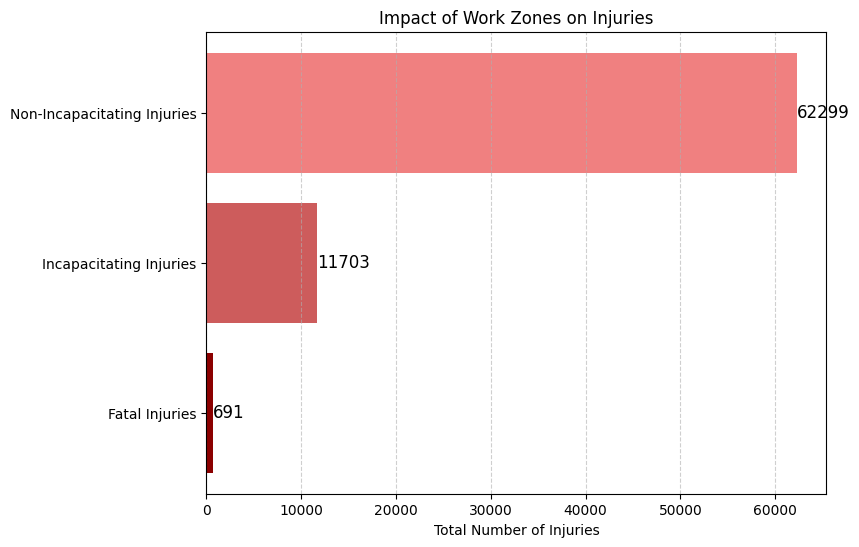

In [ ]:
work_zone_df = df[df['WORK_ZONE_I'] == 'Y'] # filtering data to only work zones
work_zone_df = df.query('INJURIES_FATAL != "Not Available" and INJURIES_INCAPACITATING != "Not Available" and INJURIES_NON_INCAPACITATING != "Not Available"')

# counting the number of injuries in work zones
work_zone_fatal_injuries = work_zone_df['INJURIES_FATAL'].sum()
work_zone_incapacitating_injuries = work_zone_df['INJURIES_INCAPACITATING'].sum()
work_zone_non_incapacitating_injuries = work_zone_df['INJURIES_NON_INCAPACITATING'].sum()

# creating a df for the injuries
injury_data = pd.DataFrame({
    'Injury Type': ['Fatal Injuries', 'Incapacitating Injuries', 'Non-Incapacitating Injuries'],
    'Count': [work_zone_fatal_injuries, work_zone_incapacitating_injuries, work_zone_non_incapacitating_injuries]
})

plt.figure(figsize=(8, 6))
colors = ['darkred', 'indianred', 'lightcoral']
bars = plt.barh(injury_data['Injury Type'], injury_data['Count'], color=colors)

# customizing the labels with adjusted positions
for bar in bars:
    count = int(bar.get_width())
    plt.text(count + 10, bar.get_y() + bar.get_height() / 2, f'{count}', ha='left', va='center', fontsize=12)

plt.title('Impact of Work Zones on Injuries')
plt.xlabel('Total Number of Injuries')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In this visualization, we aimed to focus on whether work zones affect the type of injuries and whether they have a severe impact. Hence, we created a stacked horizontal bar chart

Here, we are looking at three main types of injuries: the most severe ones (fatal injuries), the severe ones (incapacitating injuries), and the least severe ones (non-incapacitating injuries).
The colored bars represent how many of each type of injury there are. What's interesting is that there are fewer fatal injuries, but quite a few of the other two types. This tells us that while work zones does not have a lot of deadly accidents however there are still quite a few people getting hurt in other ways.

When we look at the chart we can clearly see that while work zones are generally managed well to prevent fatal injuries, there's room for improvement when it comes to preventing incapacitating and non-incapacitating injuries. These injuries, although not fatal, can have significant and sometimes long-lasting impacts on individuals involved in accidents at work zones.

##Topic 3 Implications and consequences of accidents

###3.1: The types of injuries reported during different hours of the day
What is the distribution of different injury types throughout the day, and can we identify any discernible patterns in this distribution?

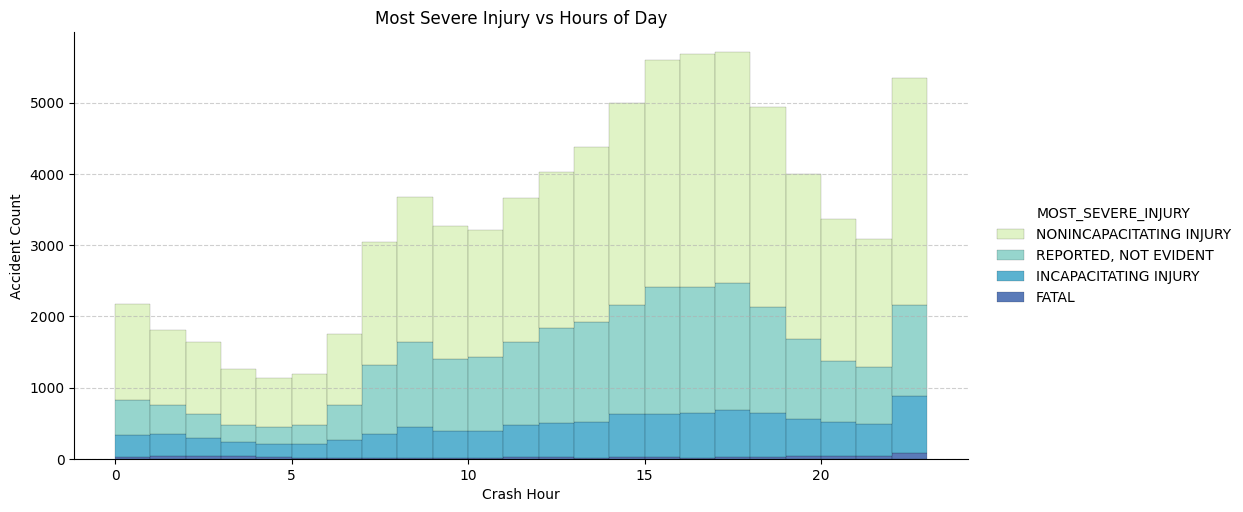

In [ ]:
# Filter the DataFrame to exclude rows with 'No Indication' in MOST_SEVERE_INJURY column
filtered_df = df.query('MOST_SEVERE_INJURY != "NO INDICATION OF INJURY" and MOST_SEVERE_INJURY != "Not Available"')
# Define the order for the legend
legend_order = ["NONINCAPACITATING INJURY", "REPORTED, NOT EVIDENT", "INCAPACITATING INJURY", "FATAL"]
sns.displot(data=filtered_df, x="CRASH_HOUR", hue="MOST_SEVERE_INJURY", multiple="stack", height=5, aspect=2, palette="YlGnBu", linewidth=0.1, binwidth=1, hue_order=legend_order)
plt.title('Most Severe Injury vs Hours of Day')
plt.xlabel('Crash Hour')
plt.ylabel('Accident Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In this chart we aimed to facus in the types of injury that cause a harm to pepole which are: non-incapaciting, incapaciting, fatal injries, an any reported injury. Thus, we have execulded no injuries values.

Upon analyzing the charts, it becomes evident that all types of injuries follow a similar daily pattern. Starting at 12 AM, the number of injuries begins to gradually decrease until they slightly rise, reaching their morning peak at 8 AM. However, it's worth noting that fatal injuries exhibit a different pattern, with their peak occurring at 4:00 AM.

As we move into the latter part of the day, injuries show a slight increase, with the highest point for 'reported, not evident' injuries occurring between 5:00 PM and 6:00 PM. For the other types of injuries, there is a noticeable increase at 6:00 PM, followed by a slight decrease over the period from 6 PM to 10 PM. Subsequently, from 11 PM to 12 AM, the peak is recorded for fatal, incapacitating, and non-incapacitating injuries.

###3.2: Distribution of different crash causes by hours of day
What is the distribution of the crashes for the various causes associated?

In [ ]:
# Categorizing PRIM_CONTRIBUTORY_CAUSE column into 6 categories
cause_mapping = {
    'Human Error': [
        'FAILING TO YIELD RIGHT-OF-WAY', 'IMPROPER OVERTAKING/PASSING', 'IMPROPER LANE USAGE',
        'FAILING TO REDUCE SPEED TO AVOID CRASH', 'IMPROPER TURNING/NO SIGNAL',
        'FOLLOWING TOO CLOSELY', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
        'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
        'DISREGARDING TRAFFIC SIGNALS', 'DISREGARDING STOP SIGN', 'TURNING RIGHT on RED',
        'DISREGARDING OTHER TRAFFIC SIGNS', 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
        'DISREGARDING YIELD SIGN', 'PASSING STOPPED SCHOOL BUS',
        'EXCEEDING AUTHORIZED SPEED LIMIT', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
        'BICYCLE ADVANCING LEGALLY ON RED LIGHT','IMPROPER BACKING','DRIVING ON WRONG SIDE/WRONG WAY','EXCEEDING SAFE SPEED FOR CONDITIONS',
    ],
    'Environmental Factors': [
        'WEATHER', 'ROAD CONSTRUCTION/MAINTENANCE', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
        'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST', 'OBSTRUCTED CROSSWALKS',
    ],
    'Technical Failures': [
        'EQUIPMENT - VEHICLE CONDITION', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
    ],
    'Distracted Driving': [
        'DISTRACTION - FROM INSIDE VEHICLE', 'CELL PHONE USE OTHER THAN TEXTING',
        'DISTRACTION - FROM OUTSIDE VEHICLE', 'TEXTING',
    ],
    'Impaired Driving': [
        'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
    ],
    'Other': ['NOT APPLICABLE','ANIMAL','RELATED TO BUS STOP',]}

# Creating a new column 'PRIM_CONTRIBUTORY_CAUSE_CATEG' based on the mapping
df['PRIM_CONTRIBUTORY_CAUSE_CATEG'] = df['PRIM_CONTRIBUTORY_CAUSE'].map(
    {value: category for category, values in cause_mapping.items() for value in values})


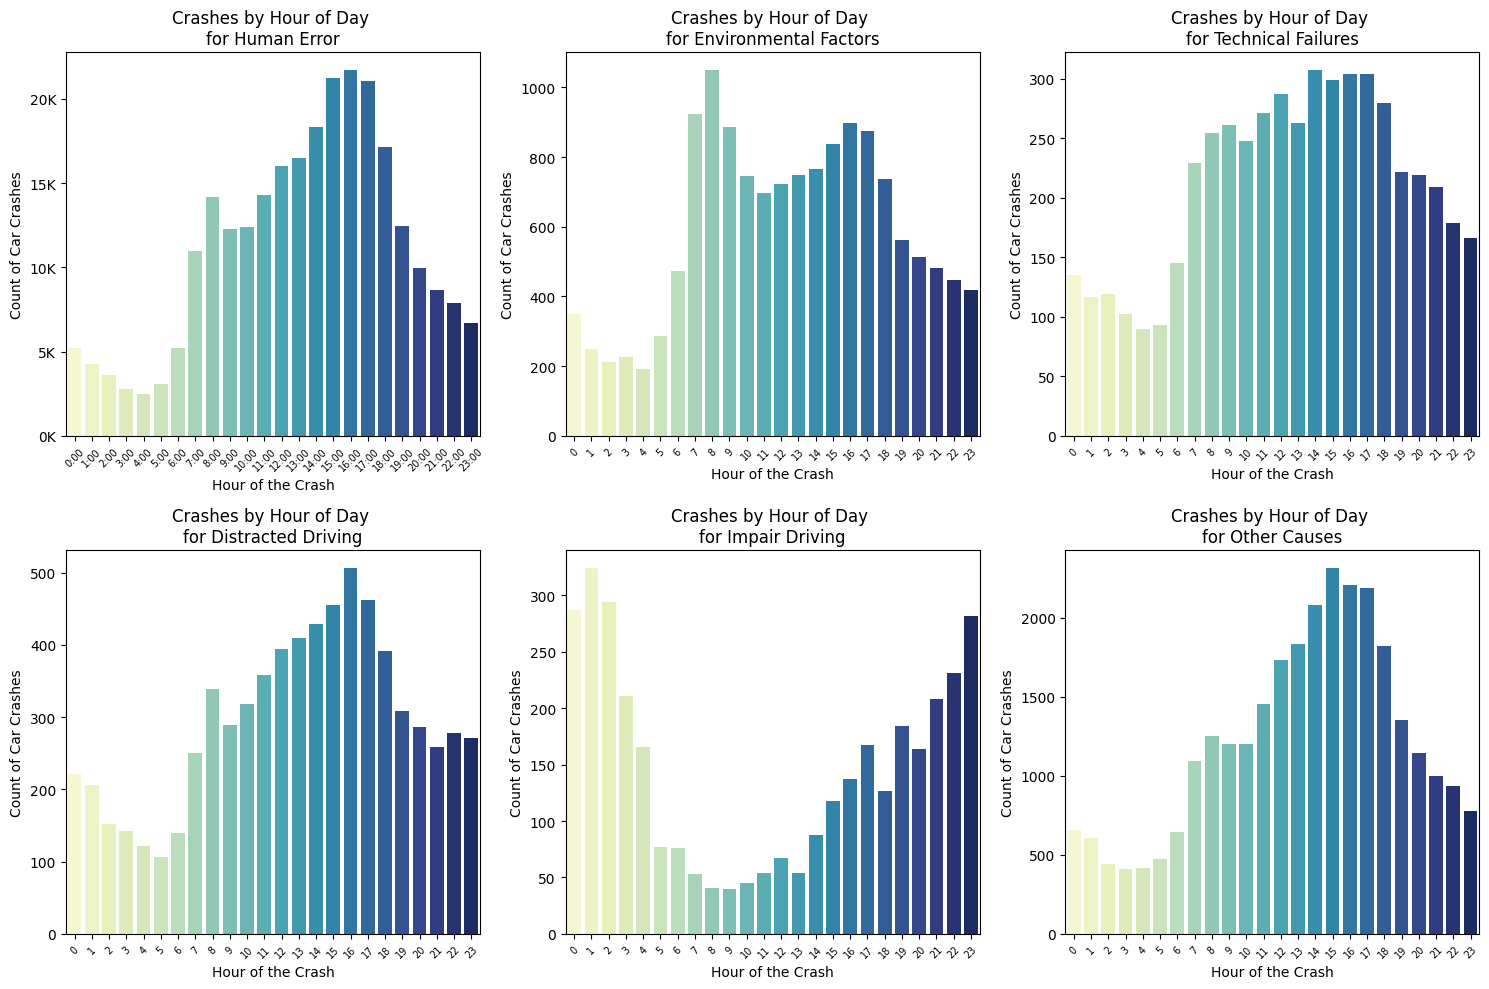

In [ ]:
# Filtering dataframes based on the primary contributory cause
df_HE = df[df["PRIM_CONTRIBUTORY_CAUSE_CATEG"]=="Human Error"]
df_EF = df[df["PRIM_CONTRIBUTORY_CAUSE_CATEG"]=="Environmental Factors"]
df_TF = df[df["PRIM_CONTRIBUTORY_CAUSE_CATEG"]=="Technical Failures"]
df_DD = df[df["PRIM_CONTRIBUTORY_CAUSE_CATEG"]=="Distracted Driving"]
df_ID = df[df["PRIM_CONTRIBUTORY_CAUSE_CATEG"]=="Impaired Driving"]
df_O = df[df["PRIM_CONTRIBUTORY_CAUSE_CATEG"]=="Other"]

# Human Error by Hour of Day
plt.figure(figsize=(15, 10))

# First subplot
plt.subplot(2, 3, 1)
sns.countplot(df_HE, x='CRASH_HOUR', palette="YlGnBu")
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day \nfor Human Error')
plt.xticks(rotation=45, fontsize=7)

ax = plt.gca()
y_ticks = ax.get_yticks()
y_labels = [f'{int(label/1000)}K' for label in y_ticks]
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(FixedFormatter(y_labels))

x_ticks = ax.get_xticks()
x_labels = [str(int(label)) + ":00" for label in x_ticks]
ax.set_xticklabels(x_labels)

plt.subplot(2, 3, 2)
sns.countplot(df_EF, x='CRASH_HOUR', palette="YlGnBu")
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day \nfor Environmental Factors')
plt.xticks(rotation=45, fontsize=7)

plt.subplot(2, 3, 3)
sns.countplot(df_TF, x='CRASH_HOUR', palette="YlGnBu")
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day \nfor Technical Failures')
plt.xticks(rotation=45, fontsize=7)

plt.subplot(2, 3, 4)
sns.countplot(df_DD, x='CRASH_HOUR', palette="YlGnBu")
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day \nfor Distracted Driving')
plt.xticks(rotation=45, fontsize=7)

plt.subplot(2, 3, 5)
sns.countplot(df_ID, x='CRASH_HOUR', palette="YlGnBu")
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day \nfor Impair Driving')
plt.xticks(rotation=45, fontsize=7)

plt.subplot(2, 3, 6)

sns.countplot(df_O, x='CRASH_HOUR', palette="YlGnBu")
plt.xlabel('Hour of the Crash')
plt.ylabel('Count of Car Crashes')
plt.title('Crashes by Hour of Day \nfor Other Causes')
plt.xticks(rotation=45, fontsize=7)

plt.tight_layout()

plt.show();


Looking at the distribution of crashes categorized by different contributory causes, there are some interesting trends we can see. The graph for distracted driving, technical failures and other have similar trends as the overall graph, but impaired driving exhibited highest numbers as time approaches midnight, which is when there would be a higher number of individuals drinking in general. Further, environmental factors graph has a spike from 7-9am, and then another one from 5-7pm, which coincides with the morning and afternoon rush hours.

###3.3: Financial losses and injury heat-map
What are the consequences of traffic accidents in Chicago? In other words, how is the distribution of financial damage and personal injury severity in all car crashes?

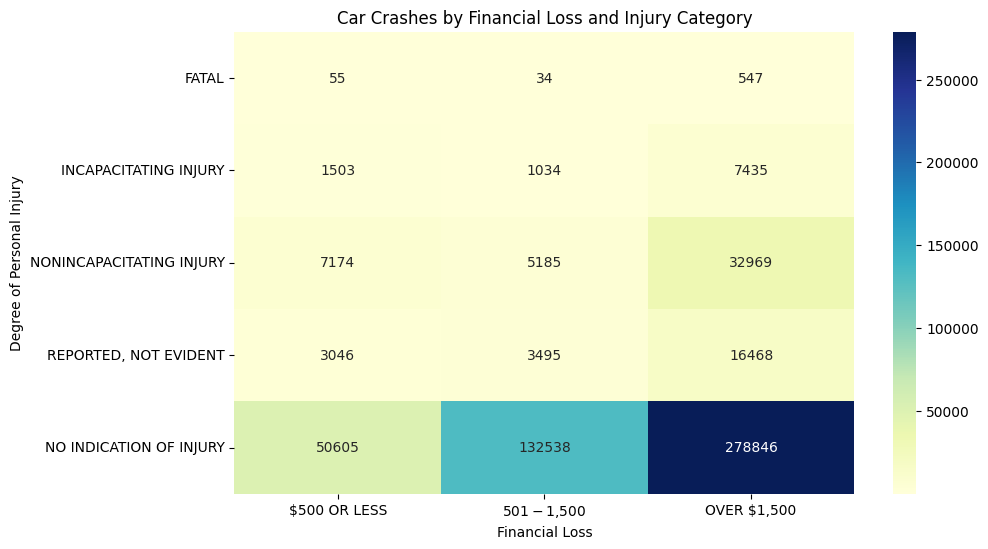

In [ ]:
# Define a custom order for the Injury Categories
custom_order_injury = ['FATAL','INCAPACITATING INJURY', 'NONINCAPACITATING INJURY', 'REPORTED, NOT EVIDENT' ,'NO INDICATION OF INJURY']
# Convert the 'Injury Category' column to a Categorical data type with the specified order
df['MOST_SEVERE_INJURY'] = pd.Categorical(df['MOST_SEVERE_INJURY'], categories=custom_order_injury, ordered=True)
# Pivot the data using pivot_table to create a matrix
heatmap_data = df.pivot_table(index='MOST_SEVERE_INJURY', columns='DAMAGE', values='CRASH_RECORD_ID', aggfunc='count')
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Car Crashes by Financial Loss and Injury Category')
plt.xlabel('Financial Loss')
plt.ylabel('Degree of Personal Injury')
plt.show()

To understand the impact and consequences of traffic accidents in Chicago, question 3 analyzes the financial losses and personal injuries caused by car crashes.

*   ***In the 'over 1,500 dollars' financial loss category***, a significant majority of car crashes fallen in financial losses exceeding 1,500 dollars. Notably, approximately 280,000 car incidents had no injuries to individuals, while nearly 33,000 people sustained Nonincapacitating Injuries and became as the second-highest injury. Moreover, it had the highest frequency of fatal events, with 547 people lost their lives. Comparing to all other categories combined, this frequency is approximately six times greater than the combined total of fatalities in the other categories.
*   ***In the '501-1,500 dollars' financial loss category***, the number of accidents decreased compared to the '1,500 dollars' category. The majority of car crashes in this category had no reported injuries, and approximately 5,000 people sustained Nonincapacitating injuries making it the second-highest injury category. Additionally, this category had the lowest number of fatal events, with 40 people lost their lives.
*   **In the '500 dollars or less' financial loss category**, it had the lowest number of car crashes compared to the other categories. Nearly 50,000 car crashes were reported with no reported injuries to people. Nonincapacitating injuries were reported in around 7,000 car crashes, making it the second-highest injury category. Additionally, fatal events were slightly increased to report 55 people lost their lives.

###3.4: Primary contributing causes for most financial losses & fatal injuries

What are the primary causes in events with the highest financial damage and the most severe personal injuries?

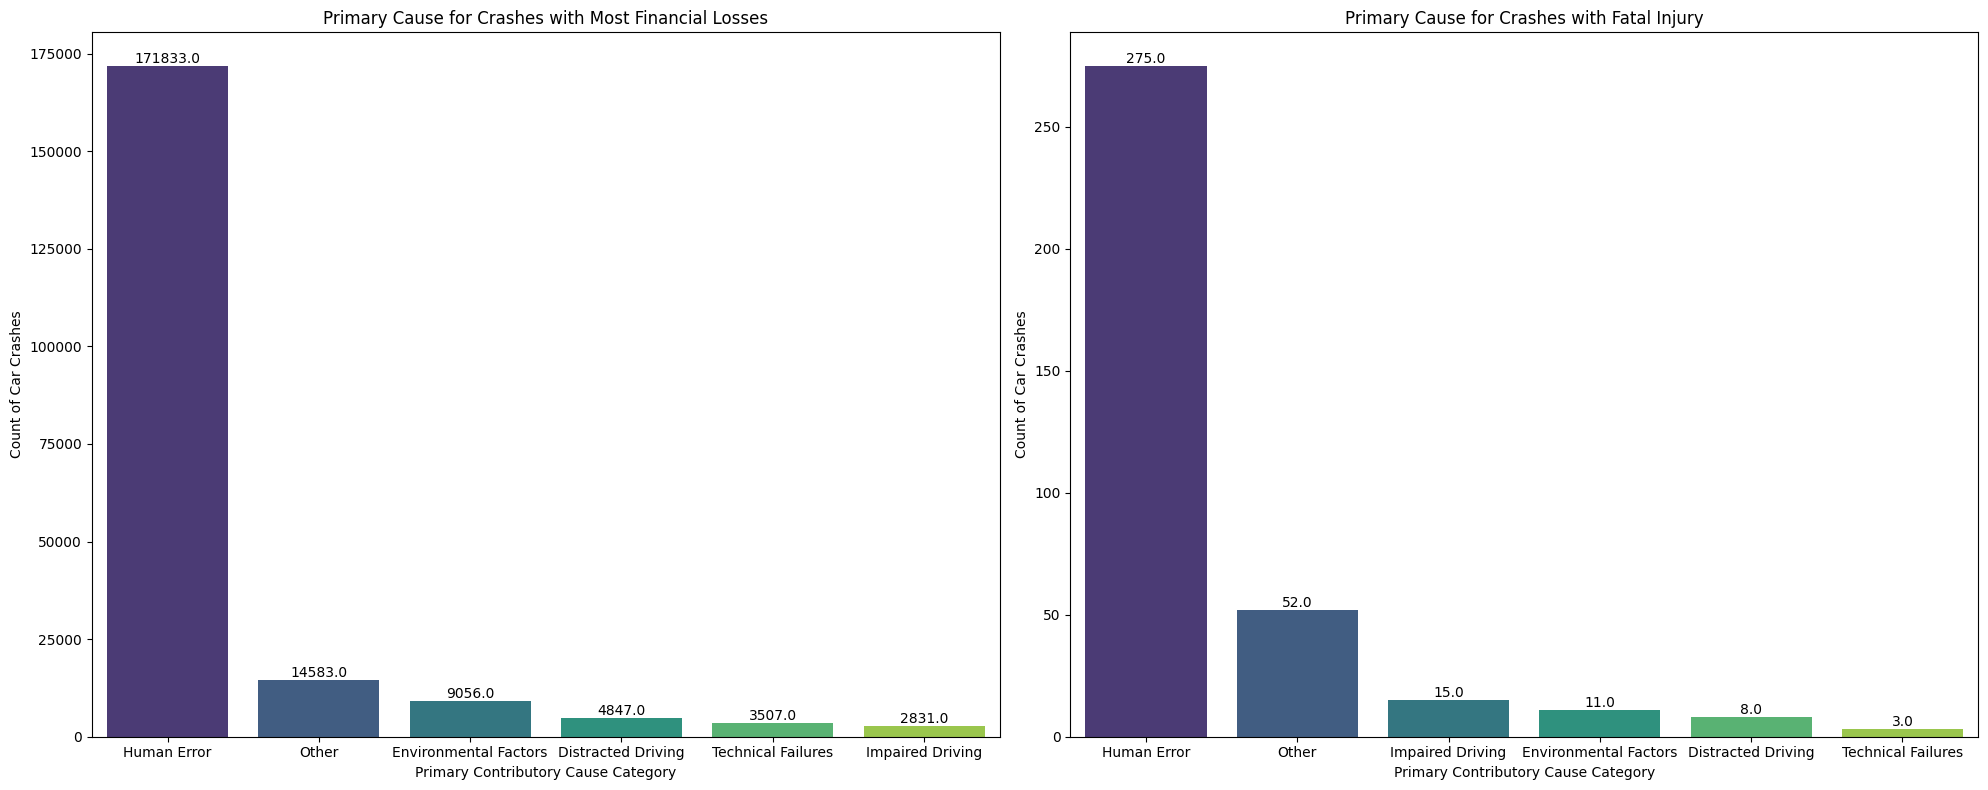

In [ ]:
# Filter conditions: Maximum damage loss and no injuries
max_damage_df = df[(df['DAMAGE'] == 'OVER $1,500')]
# Filter conditions: Maximum money loss and fatal injuries
max_fatal_df = df[(df['MOST_SEVERE_INJURY'] == 'FATAL')]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1 Primary Cause for Most Damages and No Injury
ax = sns.countplot(data=max_damage_df, x='PRIM_CONTRIBUTORY_CAUSE_CATEG', order=max_damage_df['PRIM_CONTRIBUTORY_CAUSE_CATEG'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_title('Primary Cause for Crashes with Most Financial Losses')
axes[0].set_xlabel('Primary Contributory Cause Category')
axes[0].set_ylabel('Count of Car Crashes')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Plot 2 Primary Cause for Most Damages and Fatal Injury
ax = sns.countplot(data=max_fatal_df, x='PRIM_CONTRIBUTORY_CAUSE_CATEG', order=max_fatal_df['PRIM_CONTRIBUTORY_CAUSE_CATEG'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_title('Primary Cause for Crashes with Fatal Injury')
axes[1].set_xlabel('Primary Contributory Cause Category')
axes[1].set_ylabel('Count of Car Crashes')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined graph
plt.show()

Based on the chart titled **‘Primary Cause for Crashes with Most Financial Losses’**, it can be seen clearly that Human Errors stand out as the primary cause behind car crashes resulting in substantial financial losses. Over 170,000 car-crashes happened because of human errors. Other reasons are sharply decreased to accounting for approximately 15,000 accidents, with a noticeable steady decline to report around 2,800 car crashes as a result of impaired driving.

When examining car **crashes resulting in fatal injuries,** Human Errors indicated as the primary factor. Other factors, such as accidents involving animals on the road, were responsible for approximately 52 fatal injuries. In contrast, the incidence of fatalities due to car technical failures remained relatively low, accounting for approximately 3 lives lost.



###3.5: Human error breakdown with most financial losses

How does human error play a role in car crashes with the highest financial damage? What are the specific factors contributing to human error?


In [ ]:
human_error_df = df[(df['DAMAGE'] == 'OVER $1,500') & (df['PRIM_CONTRIBUTORY_CAUSE_CATEG'] == 'Human Error')]
pivot_table = human_error_df.pivot_table(index='PRIM_CONTRIBUTORY_CAUSE', values='CRASH_RECORD_ID', aggfunc='count', fill_value=0)
pivot_table = pivot_table.rename(columns={'CRASH_RECORD_ID': 'Car_Crashes_Count'})
pivot_table = pivot_table.sort_values(by='Car_Crashes_Count', ascending=False)
print(pivot_table)

                                                    Car_Crashes_Count
PRIM_CONTRIBUTORY_CAUSE                                              
FAILING TO YIELD RIGHT-OF-WAY                                   40254
FOLLOWING TOO CLOSELY                                           29142
FAILING TO REDUCE SPEED TO AVOID CRASH                          17824
IMPROPER OVERTAKING/PASSING                                     14565
IMPROPER TURNING/NO SIGNAL                                      12174
IMPROPER LANE USAGE                                             11958
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                             10716
IMPROPER BACKING                                                10065
DISREGARDING TRAFFIC SIGNALS                                     9572
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELES...               5251
DISREGARDING STOP SIGN                                           5044
DRIVING ON WRONG SIDE/WRONG WAY                                  2286
DISREGARDING OTHER T

In [ ]:
df['Year'] = pd.to_datetime(df['CRASH_DATE']).dt.year
damage_filtered_df = df[(df['PRIM_CONTRIBUTORY_CAUSE_CATEG'] == 'Human Error') & (df['DAMAGE'] == 'OVER $1,500')]
damage_crashes_by_year_count = damage_filtered_df.groupby(['Year', 'PRIM_CONTRIBUTORY_CAUSE'])['CRASH_RECORD_ID'].count().reset_index()
damage_crashes_by_year_count

Year                            PRIM_CONTRIBUTORY_CAUSE  CRASH_RECORD_ID
0   2018             BICYCLE ADVANCING LEGALLY ON RED LIGHT                7
1   2018                   DISREGARDING OTHER TRAFFIC SIGNS              203
2   2018                             DISREGARDING STOP SIGN              982
3   2018                       DISREGARDING TRAFFIC SIGNALS             1764
4   2018                            DISREGARDING YIELD SIGN               21
..   ...                                                ...              ...
88  2022                        IMPROPER OVERTAKING/PASSING             3276
89  2022                         IMPROPER TURNING/NO SIGNAL             2554
90  2022          MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT                1
91  2022  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...             1030
92  2022                         PASSING STOPPED SCHOOL BUS                7

[93 rows x 3 columns]

<Figure size 1200x800 with 0 Axes>

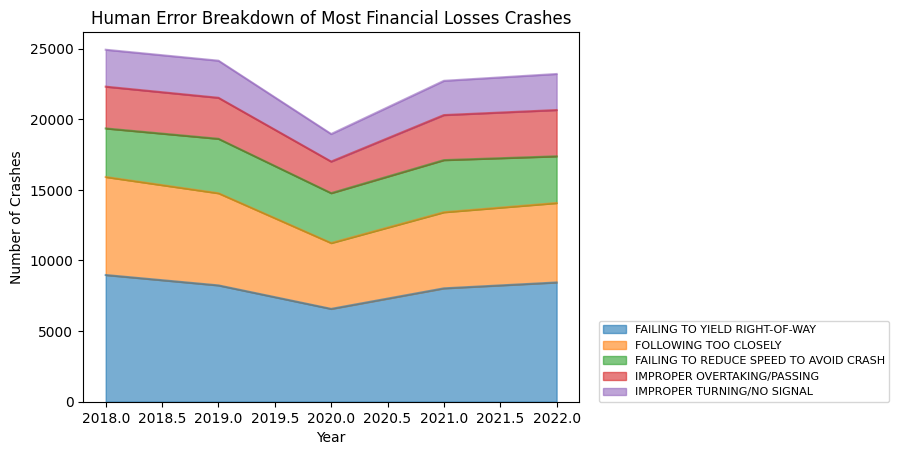

In [ ]:
pivot_table = damage_crashes_by_year_count.pivot_table(index='Year', columns='PRIM_CONTRIBUTORY_CAUSE',
                                                       values='CRASH_RECORD_ID', aggfunc='sum', fill_value=0)
top_5_causes = pivot_table.sum().nlargest(5).index
pivot_table = pivot_table[top_5_causes]

plt.figure(figsize=(12, 8))
pivot_table.plot(kind='area', alpha=0.6)

plt.title('Human Error Breakdown of Most Financial Losses Crashes')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend(loc=(1.04, 0), prop={'size': 8})
plt.show()

In accidents with the highest financial damage (over $1,500), there are approximately 170,000 cases attributed to human errors. For a more in-depth analysis of the causes of these accidents, we examined the subcategories of human error and selected the top 5 to display in the chart.
> From the table, we can observe that "Failing to yield the right-of-way" is the primary cause, accounting for 27%. It is followed by "Following too closely" and "Failing to reduce speed to avoid a crash" at 17% and 10%, respectively.

###3.6: Human error breakdown with fatal injuries
How does human error contribute to car crashes with fatalities? What are the specific causes of human error in such cases?


In [ ]:
human_error_df = df[(df['MOST_SEVERE_INJURY'] == 'FATAL')& (df['PRIM_CONTRIBUTORY_CAUSE_CATEG'] == 'Human Error')]
# Create a pivot table with "PRIM_CONTRIBUTORY_CAUSE" as rows and "DAMAGE" as columns, with "count" as aggfunc
pivot_table = human_error_df.pivot_table(index='PRIM_CONTRIBUTORY_CAUSE', values='CRASH_RECORD_ID', aggfunc='count', fill_value=0)
pivot_table = pivot_table.rename(columns={'CRASH_RECORD_ID': 'Car_Crashes_Count'})
# Sort the pivot table by the "CRASH_RECORD_ID" column in descending order
pivot_table = pivot_table.sort_values(by='Car_Crashes_Count', ascending=False)
print(pivot_table)

                                                    Car_Crashes_Count
PRIM_CONTRIBUTORY_CAUSE                                              
FAILING TO YIELD RIGHT-OF-WAY                                      62
FAILING TO REDUCE SPEED TO AVOID CRASH                             56
DISREGARDING TRAFFIC SIGNALS                                       53
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELES...                 33
DRIVING ON WRONG SIDE/WRONG WAY                                    13
IMPROPER OVERTAKING/PASSING                                        12
EXCEEDING AUTHORIZED SPEED LIMIT                                   11
IMPROPER LANE USAGE                                                 9
DISREGARDING STOP SIGN                                              6
FOLLOWING TOO CLOSELY                                               4
IMPROPER TURNING/NO SIGNAL                                          4
DISREGARDING OTHER TRAFFIC SIGNS                                    3
DRIVING SKILLS/KNOWL

In [ ]:
df['Year'] = pd.to_datetime(df['CRASH_DATE']).dt.year
fatal_filtered_df = df[(df['PRIM_CONTRIBUTORY_CAUSE_CATEG'] == 'Human Error') & (df['MOST_SEVERE_INJURY'] == 'FATAL')]
fatal_crashes_by_year_count = fatal_filtered_df.groupby(['Year', 'PRIM_CONTRIBUTORY_CAUSE'])['CRASH_RECORD_ID'].count().reset_index()
fatal_crashes_by_year_count

Year                            PRIM_CONTRIBUTORY_CAUSE  CRASH_RECORD_ID
0   2018                       DISREGARDING TRAFFIC SIGNALS                5
1   2018                    DRIVING ON WRONG SIDE/WRONG WAY                5
2   2018                   EXCEEDING AUTHORIZED SPEED LIMIT               10
3   2018                EXCEEDING SAFE SPEED FOR CONDITIONS                2
4   2018             FAILING TO REDUCE SPEED TO AVOID CRASH                8
5   2018                      FAILING TO YIELD RIGHT-OF-WAY               13
6   2018                              FOLLOWING TOO CLOSELY                1
7   2018                                IMPROPER LANE USAGE                2
8   2018                        IMPROPER OVERTAKING/PASSING                1
9   2018  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...                3
10  2019                             DISREGARDING STOP SIGN                1
11  2019                       DISREGARDING TRAFFIC SIGNALS                8
12  2019                DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                1
13  2019                   EXCEEDING AUTHORIZED SPEED LIMIT                1
14  2019                EXCEEDING SAFE SPEED FOR CONDITIONS                1
15  2019             FAILING TO REDUCE SPEED TO AVOID CRASH               10
16  2019                      FAILING TO YIELD RIGHT-OF-WAY                9
17  2019                              FOLLOWING TOO CLOSELY                1
18  2019                                   IMPROPER BACKING                1
19  2019                                IMPROPER LANE USAGE                1
20  2019                        IMPROPER OVERTAKING/PASSING                1
21  2019  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...                8
22  2020                   DISREGARDING OTHER TRAFFIC SIGNS                1
23  2020                       DISREGARDING TRAFFIC SIGNALS               15
24  2020                    DRIVING ON WRONG SIDE/WRONG WAY                1
25  2020                DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                1
26  2020             FAILING TO REDUCE SPEED TO AVOID CRASH               10
27  2020                      FAILING TO YIELD RIGHT-OF-WAY               15
28  2020                                   IMPROPER BACKING                1
29  2020                                IMPROPER LANE USAGE                2
30  2020                        IMPROPER OVERTAKING/PASSING                4
31  2020  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...                6
32  2021                   DISREGARDING OTHER TRAFFIC SIGNS                1
33  2021                             DISREGARDING STOP SIGN                2
34  2021                       DISREGARDING TRAFFIC SIGNALS               16
35  2021                    DRIVING ON WRONG SIDE/WRONG WAY                6
36  2021                DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                1
37  2021             FAILING TO REDUCE SPEED TO AVOID CRASH               16
38  2021                      FAILING TO YIELD RIGHT-OF-WAY               11
39  2021                              FOLLOWING TOO CLOSELY                1
40  2021                                   IMPROPER BACKING                1
41  2021                                IMPROPER LANE USAGE                2
42  2021                        IMPROPER OVERTAKING/PASSING                3
43  2021                         IMPROPER TURNING/NO SIGNAL                1
44  2021  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...               11
45  2022                   DISREGARDING OTHER TRAFFIC SIGNS                1
46  2022                             DISREGARDING STOP SIGN                3
47  2022                       DISREGARDING TRAFFIC SIGNALS                9
48  2022                    DRIVING ON WRONG SIDE/WRONG WAY                1
49  2022             FAILING TO REDUCE SPEED TO AVOID CRASH               12
50  2022                      FAILING TO YIELD RIGHT-OF-WAY               14


<Figure size 1200x800 with 0 Axes>

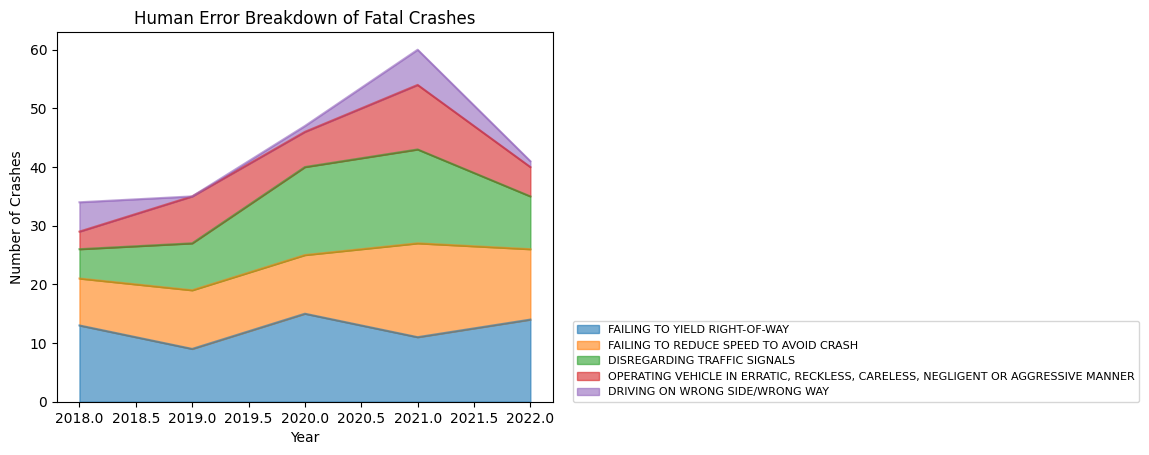

In [ ]:
pivot_table = fatal_crashes_by_year_count.pivot_table(index='Year', columns='PRIM_CONTRIBUTORY_CAUSE', values='CRASH_RECORD_ID', aggfunc='sum', fill_value=0)
top_5_causes = pivot_table.sum().nlargest(5).index
pivot_table = pivot_table[top_5_causes]

plt.figure(figsize=(12, 8))
pivot_table.plot(kind='area', alpha=0.6)

plt.title('Human Error Breakdown of Fatal Crashes')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend(loc=(1.04, 0), prop={'size': 8})
plt.show()

In accidents resulting in fatalities, there were 275 cases attributed to Human Error. For a more in-depth analysis of the specific causes of these accidents, we examined the subcategories of human error and selected the top 5 to display in the chart.

> From the table, we can observe that "Failing to yield the right-of-way," which was also the primary cause of accidents with the most financial damage, is a major contributor to fatalities, accounting for 22%. The number of accidents caused by "Failing to reduce speed to avoid a crash" and "Disregarding traffic signals" is quite similar, with both accounting for approximately 20%.



###3.7: Fatalities by other contributory causes
Given that fatalities have devastating consequences for everyone, what are the other significant contributing factors that are worth exploring?

In [ ]:
fatal_filtered_df2 = df[(df['PRIM_CONTRIBUTORY_CAUSE_CATEG'] != 'Human Error') & (df['MOST_SEVERE_INJURY'] == 'FATAL')]
pivot_table_result = fatal_filtered_df2.pivot_table(values='CRASH_RECORD_ID', index=['PRIM_CONTRIBUTORY_CAUSE_CATEG', 'PRIM_CONTRIBUTORY_CAUSE'],
                                                   columns='MOST_SEVERE_INJURY', aggfunc='count')
pivot_table_result

MOST_SEVERE_INJURY                                                                FATAL  \
PRIM_CONTRIBUTORY_CAUSE_CATEG PRIM_CONTRIBUTORY_CAUSE                                     
Distracted Driving            DISREGARDING ROAD MARKINGS                              0   
                              DISTRACTION - FROM INSIDE VEHICLE                       3   
                              DISTRACTION - FROM OUTSIDE VEHICLE                      5   
                              EQUIPMENT - VEHICLE CONDITION                           0   
                              EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST       0   
...                                                                                 ...   
Technical Failures            ROAD ENGINEERING/SURFACE/MARKING DEFECTS                1   
                              UNABLE TO DETERMINE                                     0   
                              UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ...      0   
                              VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ...      0   
                              WEATHER                                                 0   

MOST_SEVERE_INJURY                                                                INCAPACITATING INJURY  \
PRIM_CONTRIBUTORY_CAUSE_CATEG PRIM_CONTRIBUTORY_CAUSE                                                     
Distracted Driving            DISREGARDING ROAD MARKINGS                                              0   
                              DISTRACTION - FROM INSIDE VEHICLE                                       0   
                              DISTRACTION - FROM OUTSIDE VEHICLE                                      0   
                              EQUIPMENT - VEHICLE CONDITION                                           0   
                              EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST                       0   
...                                                                                                 ...   
Technical Failures            ROAD ENGINEERING/SURFACE/MARKING DEFECTS                                0   
                              UNABLE TO DETERMINE                                                     0   
                              UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ...                      0   
                              VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ...                      0   
                              WEATHER                                                                 0   

MOST_SEVERE_INJURY                                                                NONINCAPACITATING INJURY  \
PRIM_CONTRIBUTORY_CAUSE_CATEG PRIM_CONTRIBUTORY_CAUSE                                                        
Distracted Driving            DISREGARDING ROAD MARKINGS                                                 0   
                              DISTRACTION - FROM INSIDE VEHICLE                                          0   
                              DISTRACTION - FROM OUTSIDE VEHICLE                                         0   
                              EQUIPMENT - VEHICLE CONDITION                                              0   
                              EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST                          0   
...                                                                                                    ...   
Technical Failures            ROAD ENGINEERING/SURFACE/MARKING DEFECTS                                   0   
                              UNABLE TO DETERMINE                                                        0   
                              UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ...                         0   
                              VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ...                         0   
                              WEATHER                                                                   

In [ ]:
import plotly.express as px
sorted_categories = pivot_table_result.groupby('PRIM_CONTRIBUTORY_CAUSE_CATEG')['FATAL'].sum().sort_values(ascending=False).index

fig = px.bar(pivot_table_result.reset_index(), x='PRIM_CONTRIBUTORY_CAUSE_CATEG', y='FATAL', color='PRIM_CONTRIBUTORY_CAUSE', category_orders={"PRIM_CONTRIBUTORY_CAUSE_CATEG": sorted_categories})
fig.update_layout(
    title='Fatalities by Contributory Cause Category',
    xaxis_title='Contributory Cause',
    yaxis_title='Fatalities')
fig.show()

Due to the severe impact of accidents resulting in fatalities on individuals and families, we will conduct a more in-depth investigation into the specific causes of fatal accidents, beyond human error. Our goal is to minimize the occurrence of such consequences to the greatest extent possible.

> Apart from human error, the second largest portion is categorized as "other." Unfortunately, a significant portion of the causes falls under "Not Applicable," making further analysis impossible. "Impaired Driving" is the third most significant reason, where drivers operate vehicles under the influence of alcohol or drugs, impairing their ability to drive safely.

Other primary reasons, compared to Human Error and Impaired Driving, are relatively beyond the driver's control. They manifest as obstructed driver visibility, driver distraction, animal attacks, and various vehicle-related technical issues.

# **Conclusion & Recommendation**

Based on the findings from our data study on car accidents in Chicago, we have provided key observations and recommendations to enhance road safety and reduce the frequency and severity of accidents in the city.
Recommendations:

1. **Enhanced Road Safety Measures**:
  - Our analysis highlights the importance of focusing on favorable environmental conditions, as most accidents occur during daylight on dry roads. It's essential to maintain road safety, ad vigilance initiatives under these ideal circumstances, as a significant proportion of accidents take place in these conditions.
2. **Intersection and Road Improvements**:
  - The dataset indicates that common road intersections and certain road types, such as medians and special lanes, are hotspots for accidents. Authorities should consider optimizing traffic planning and signals at these locations to reduce the risks associated with high traffic flow. The data also emphasizes the importance of clearer lane markings and improved visibility at intersections with high accident rates.
3. **Educational Campaigns and Enforcement**:
  - The frequency of rear-end collisions, side collisions, and turning collisions emphasizes the need for awareness campaigns against tailgating, distracted driving, and better adherence to traffic rules and signs. Educational initiatives and law enforcement efforts in these areas can significantly reduce the occurrence of these accidents.
4. **Data-Driven Decision Making**:
  - Our analysis demonstrates the value of data in identifying patterns and causes of accidents. To continue improving road safety, it is crucial for authorities to invest in data collection and analysis efforts. By gathering more precise data at the village and individual levels, better insights can be gained for targeted interventions.

In addition to these recommendations, we recognize the urgency of addressing accidents resulting in fatalities. Our analysis reveals that "Impaired Driving" emerges as the most significant reason, highlighting the dangers of driving under the influence of alcohol or drugs.

There are primary reasons, other than human error and impaired driving, which are relatively beyond the driver's control. These include issues like obstructed driver visibility, driver distraction, animal attacks, and various vehicle-related technical problems.

Addressing these factors in addition to the recommendations provided will be crucial in achieving a safer road environment for all residents and commuters in Chicago.


# **Challenges**
First of all, we faced a lot of difficulty in deciding how to perform data cleaning since we had a lot of missing values in every column and had to figure out which function to use (either drop the whole column, whole row or perform data imputation). Hence, we utilized the filter function to make our data processing faster and much more efficient. Moreover, we dropped irrelevant columns which would make our Colab notebook run much faster.

Also, there is not consistent data for financial loses hence we had to choose between a lot of different visualizations and reframe our questions for it. Particularly for our map, since the data set has over 763,000 rows, we had to use data sampling to make our map run faster and use a lot of filtering to make our Colab notebook much more efficient.

# **References**

1. https://python-visualization.github.io/folium/latest/

2. https://medium.com/@sawsanyusuf/data-visualization-with-python-9-generating-maps-with-folium-e7563bc1a923

3. https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if


**Use of Gen AI**

1. We used generative AI to provide 6 appropriate category labels, under which we could categorize all the unique contributory causes for car accidents. Similarly, we generated category labels for the unique values of traffic control devices and weather conditions as well.
